# Linear Regression

### Objective: Predict mileage of car using car features

In this exercise we build the linear regression algorithm with penalization term in the objective function (Ridge Regression) using numpy. We then apply the algorithm to predict the miles per gallon a car will get using six features about that car. The data is standardized. The input variables are anonymous except the 4th and 6th dimension which correspond to **car weight** and **car year**.

The penalization coefficient ($\lambda$) is varied and the feature weights are plotted against degree of freedoms for values of $\lambda$ ranging from 0 to 5000. 

$\lambda = 0 $ corresponds to Simple Linear Regression (no penalty).

\begin{equation} w_{rr} = arg \ \underset{w}{min}\ \left\Vert y - Xw\right\Vert^2 + \lambda\ \left\Vert w \right\Vert^2  \end{equation}
\begin{equation}
\begin{split}
L &=\ \left\Vert y - Xw \right \Vert^2 + \lambda \ \left \Vert w \right \Vert ^2 \\
 &=(y - Xw)^{T} (y - Xw) + \lambda w^T w 
\end{split}
\end{equation}

To find optimum value for $ w_{rr} $, we take the gradient of $L$ and set it to zero

\begin{equation}
\nabla L_w = -2X^Ty + 2X^TXw + 2\lambda w = 0
\end{equation}

\begin{equation}\tag{1}
w_{rr} = (\lambda I + X^TX)^{-1}X^Ty
\end{equation}

Degrees of Freedom: 

\begin{equation}\tag{2}
df(\lambda) = trace \ [X(X^TX + \lambda I)^{-1}X^T]
\end{equation}

In [4]:
# import libraries
import numpy as np
import numpy.linalg as nplg
import matplotlib.pyplot as plt
% matplotlib inline

#Import Cars Data as Numpy Matrices
X_train = np.genfromtxt ('X_train.csv', delimiter=",")
Y_train = np.genfromtxt ('y_train.csv',delimiter=",")
X_test = np.genfromtxt ('X_test.csv', delimiter=",")
Y_test = np.genfromtxt ('y_test.csv',delimiter=",")

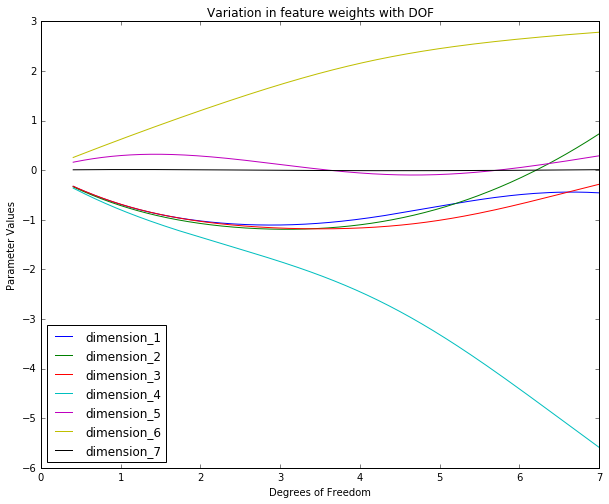

In [14]:
# Declare Identity Matrix as I
I=np.identity(len(X_train[0]))

#Intializing variables
Lambda=0
W_rr_final=[]
df=[]

# Single Value Decomposition of X_train Matrix
U, s, V = np.linalg.svd(X_train, full_matrices=True)

for Lambda in xrange(5001):
    
    # Calculating Weights using equation - (1)
    W_rr=np.dot(np.dot((np.linalg.inv(np.dot(Lambda,I) + np.dot((X_train.transpose()),X_train))),(X_train.transpose())),Y_train)
    W_rr_final.append(W_rr)
    M=np.linalg.inv((Lambda*(np.linalg.inv(np.dot(np.diag(s),np.diag(s)))) + I))
    df.append(np.trace(M))
#     print(Lambda)
    
W_rr_final=np.array(W_rr_final)

#plot degrees of freedom with parameter values
colors = [i for i in 'bgrcmyk']
label = ['dimension_'+str(i) for i in xrange(1,8)]

plt.figure(figsize=(10,8))
for i in xrange(7): 
#     plt.scatter(np.array(df),W_rr_final[:,i],c=colors[i],edgecolor='',s=10)
    plt.plot(np.array(df),W_rr_final[:,i])
    
plt.legend(label,loc=3) 
plt.title("Variation in feature weights with DOF")
plt.xlabel("Degrees of Freedom")
plt.ylabel("Parameter Values")
plt.show()


We can clearly observe that the feature weights corresponding to dimension - 4 (car weight) and dimension - 6 (car year) stand out. This means that they contribute most in predicting mileage. 

* Car weight is has high negative weight which is intuitive as greater the weight of the car, higher is the fuel consumption per mile.

* Car year has a high positive weight. This implies the newer the car, the higher is the mileage. This again makes sense since mileage decrease with increase in age of the car.

#### Next we look at how the Root Mean Squared Error varies with the variation in $\lambda$ (penalty coeffiient)

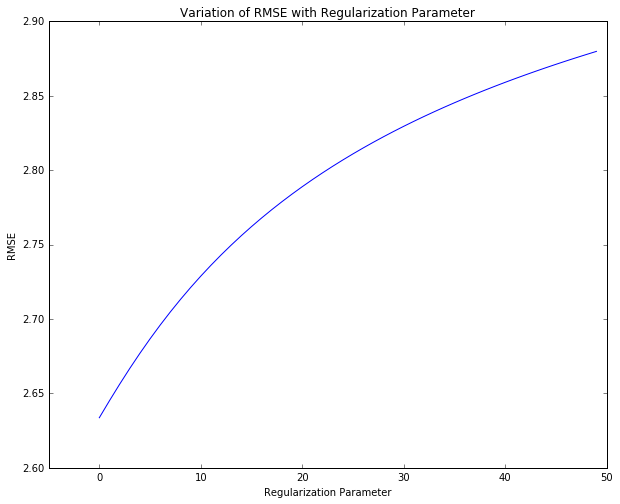

In [24]:
#Testing for Lambda 0,1,..50

lmd_range = 50
I=np.identity(X_train.shape[1])
RMSE=[]

for Lambda in xrange(lmd_range):
    W_rr=np.dot(np.dot((np.linalg.inv(np.dot(Lambda,I) + np.dot((X_train.transpose()),X_train))),(X_train.transpose())),Y_train)
    Y_pred=np.dot(X_test,W_rr)
    RMSE.append(np.sqrt((1.0/Y_test.shape[0])*sum([i*i for i in Y_test-Y_pred])))

plt.figure(figsize=(10,8))
plt.plot(xrange(lmd_range),RMSE)
plt.xlim(-5, lmd_range)
plt.xlabel("Regularization Parameter")
plt.ylabel("RMSE")
plt.title("Variation of RMSE with Regularization Parameter")
plt.show()


Clearly the RMSE is the least for $\lambda$ = 0 and is equal to 2.634.

#### We next add polynomial features of order 2 and 3 and examine the accuracy (RMSE) for different values of regularization parameter.

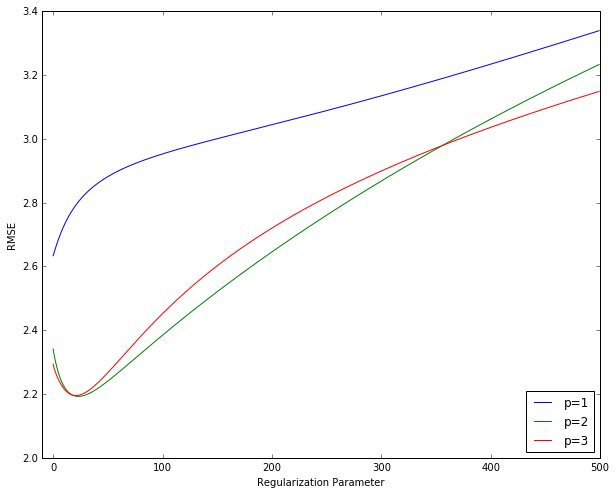

In [34]:
#Polynoial p=1,2,3
label=['p=1','p=2','p=3']
RMSE_by_degree = []
lmd_range2 = 500

X_train_sqr=np.power(X_train[:,0:6],2)
X_train_cube= np.power(X_train[:,0:6],3)

X_test_sqr=np.power(X_test[:,0:6],2)
X_test_cube= np.power(X_test[:,0:6],3)

X_train_1=X_train
X_train_2=np.concatenate((X_train_1,X_train_sqr),axis=1)
X_train_3=np.concatenate((X_train_2,X_train_cube),axis=1)

X_test_1=X_test
X_test_2=np.concatenate((X_test_1,X_test_sqr),axis=1)
X_test_3=np.concatenate((X_test_2,X_test_cube),axis=1)

plt.figure(figsize = (10,8))

for Xtrain,Xtest in [(X_train_1,X_test_1),(X_train_2,X_test_2),(X_train_3,X_test_3)]:
    RMSE=[]
    I=np.identity(len(Xtrain[0]))
    for Lambda in xrange(lmd_range2):
        W_rr=np.dot(np.dot((np.linalg.inv(np.dot(Lambda,I) + np.dot((Xtrain.transpose()),Xtrain))),(Xtrain.transpose())),Y_train)
        Y_pred=np.dot(Xtest,W_rr)
        RMSE.append(np.sqrt((1.0/42)*sum([i*i for i in Y_test-Y_pred])))
        
    plt.plot(xrange(lmd_range2),RMSE)
    RMSE_by_degree.append(RMSE)


plt.xlabel("Regularization Parameter")
plt.ylabel("RMSE")
plt.xlim(-10, lmd_range2)
# plt.title("RMSE Vs. Regularization Parameter for p th order polynomial regression")
plt.legend(label,loc=4)
plt.show()


In [48]:
# Finding the minimum value of RMSE and the corresponding $ \lambda $  and polynomial
for RMSE in np.array(RMSE_by_degree):
    print(RMSE.argmin(), RMSE[RMSE.argmin()])

(0, 2.6336435779691687)
(23, 2.1925741208642155)
(21, 2.1951151272671097)


**Hence we obtain the minimum RMSE = 2.193 for $\lambda$ = 23 and polynomial terms of degree - 2 included.**